# Statistical benefits of temporal consistency

This notebook generates one of the figures presented in the paper.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from tdsurv.plotting import setup_plotting

In [2]:
setup_plotting()

Plotting settings loaded!


In [3]:
with open("../data/datapool.pkl", "rb") as f:
    data = pickle.load(f)

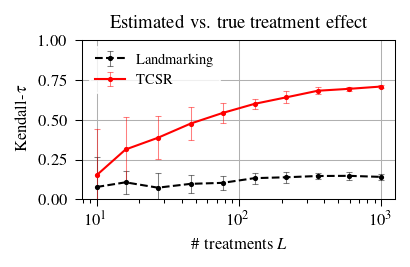

In [4]:
fig, ax = plt.subplots(figsize=(2.75, 1.85))
n = len(data["mc"])

markers, caps, bars = ax.errorbar(
    x=data["xs"],
    y=np.mean(data["mc"], axis=0),
    yerr=np.std(data["mc"], axis=0),
    linestyle="--",
    color="black",
    marker="o",
    markersize=1.5,
    capsize=1.5,
    elinewidth=0.5,
    label="Landmarking",
)
[elem.set_alpha(0.5) for elem in bars + caps]
[cap.set_markeredgewidth(0.5) for cap in caps]

markers, caps, bars = ax.errorbar(
    x=data["xs"],
    y=np.mean(data["td"], axis=0),
    yerr=np.std(data["td"], axis=0),
    linestyle="-",
    color="red",
    marker="o",
    markersize=1.5,
    capsize=1.5,
    elinewidth=0.5,
    label="TCSR",
)
[elem.set_alpha(0.5) for elem in bars + caps]
[cap.set_markeredgewidth(0.5) for cap in caps]

ax.grid(axis="both", lw=0.5)
ax.legend(frameon=True, edgecolor="white", framealpha=0.8, fontsize=7)
ax.set_xlabel(r"\# treatments $L$")
ax.set_ylabel(r"Kendall-$\tau$")
ax.set_title("Estimated vs. true treatment effect")
ax.set_xscale("log", base=10)
ax.set_ylim(bottom=0.0, top=1.0)

fig.tight_layout()
fig.savefig("datapool.pdf", bbox_inches="tight")